In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [45]:
outlets = pd.read_csv('outlets.csv', delimiter=';', dtype=str, low_memory=False)
sellout = pd.read_csv('SELLOUT_TIME.csv', delimiter=';', dtype=str, low_memory=False)
product = pd.read_csv('PRODUCTS.csv', sep = ',', low_memory=False)

In [46]:
outlets.head(5)

,outlet_id,org_name,federal_subject,address
0,00000000500601,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГАЛА...",Белгородская область,"Белгородская область, Прохоровский р-н, пгт Пр..."
1,00000000500604,"Общество с ограниченной ответственностью ""Фарм...",Ивановская область,"Ивановская область, Тейковский р-н, г Тейково,..."
2,00000000500608,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЭКОН...",Ставропольский край,"Ставропольский край, г Кисловодск, ул 40 лет О..."
3,00000000500611,"Общество с ограниченной ответственностью ""СТАМУС""",Краснодарский край,"Краснодарский край, г Краснодар, тер. Пашковск..."
4,00000000500612,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛИГА""",Москва город,"Город Москва, ш Открытое, д. 5 к. 11, помещ. 6/1"


In [47]:
sellout.head(5)

,product_id,outlet_id,org_name,cnt,sell_date
0,5000157992514,00000000298713,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ТАНДЕР""",1,2022-01-26
1,5000157992514,00000000298715,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ТАНДЕР""",1,2022-01-08
2,5000157992514,00000000298716,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",2,2022-01-20
3,5000157992514,00000000298716,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1,2022-01-27
4,5000157992514,00000000298716,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1,2022-01-28


In [48]:
product.head(5)

,product_id,product,subsegment,brand
0,4.680012e+12,Продукт желтый 1,Подсегмент желтый 1,Бренд желтый
1,5.000158e+12,Продукт синий 1,Подсегмент синий 1,Бренд синий
2,5.000158e+12,Продукт синий 2,Подсегмент синий 2,Бренд синий
3,5.000158e+12,Продукт зеленый 1,Подсегмент зеленый 1,Бренд зеленый
4,5.000158e+12,Продукт зеленый 2,Подсегмент зеленый 1,Бренд зеленый


In [49]:
# Приводим product_id к единому типу
sellout['product_id'] = sellout['product_id'].apply(lambda x: str(int(float(x))) if not pd.isna(x) else x)
product['product_id'] = product['product_id'].apply(lambda x: str(int(float(x))) if not pd.isna(x) else x)

In [50]:
# Объединяем SELLOUT с PRODUCT по product_id
full_data = sellout.merge(product, on='product_id', how='left')

# Приводим cnt к числовому типу
full_data['cnt'] = pd.to_numeric(full_data['cnt'], errors='coerce').fillna(0)

In [55]:
# Создаём папку для сохранения графиков
output_dir = "charts/task4"
os.makedirs(output_dir, exist_ok=True)

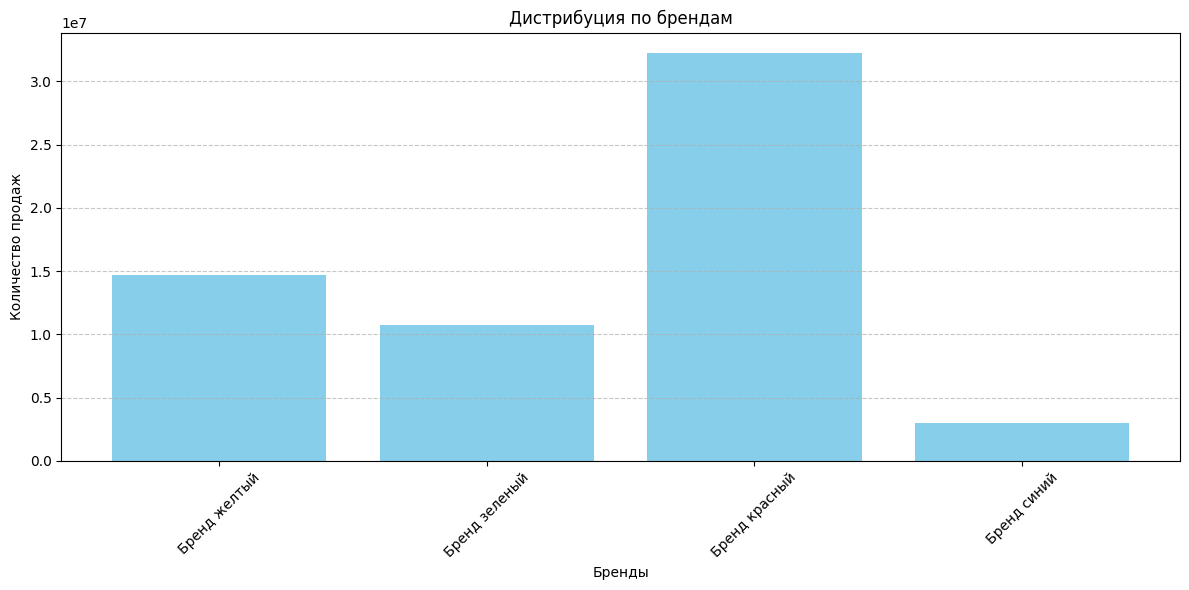

In [56]:
# 1️⃣ Дистрибуция по брендам
distribution_by_brand = full_data.groupby('brand')['cnt'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(distribution_by_brand['brand'], distribution_by_brand['cnt'], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Бренды")
plt.ylabel("Количество продаж")
plt.title("Дистрибуция по брендам")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "distribution_by_brand.png"))

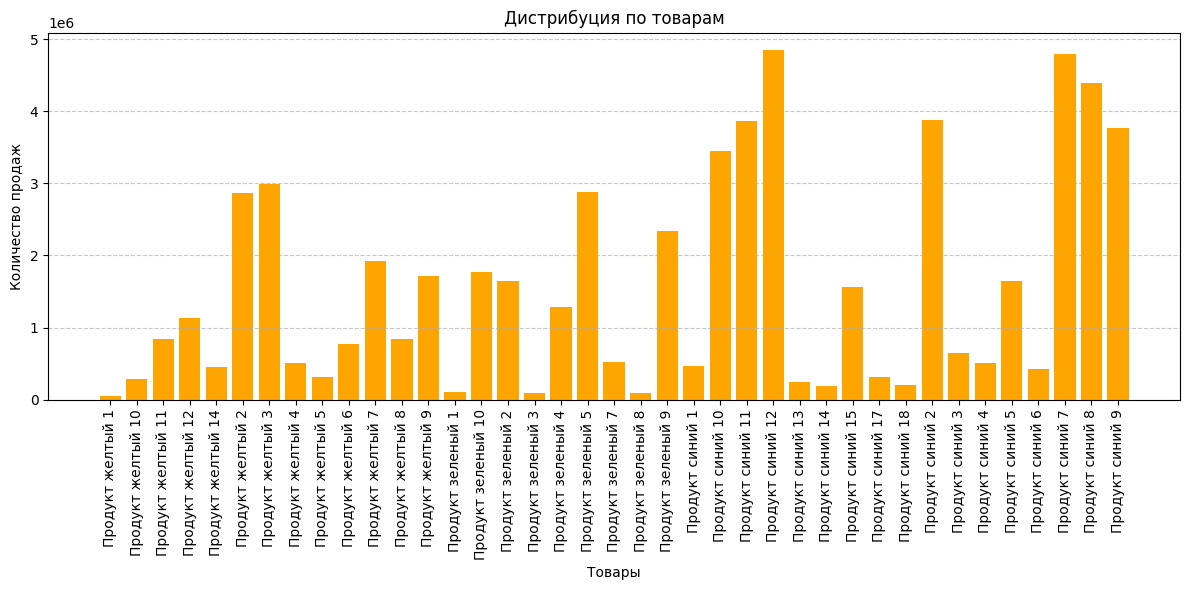

In [57]:
# 2️⃣ Дистрибуция по товарам
distribution_by_product = full_data.groupby('product')['cnt'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(distribution_by_product['product'], distribution_by_product['cnt'], color='orange')
plt.xticks(rotation=90)
plt.xlabel("Товары")
plt.ylabel("Количество продаж")
plt.title("Дистрибуция по товарам")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "distribution_by_product.png"))

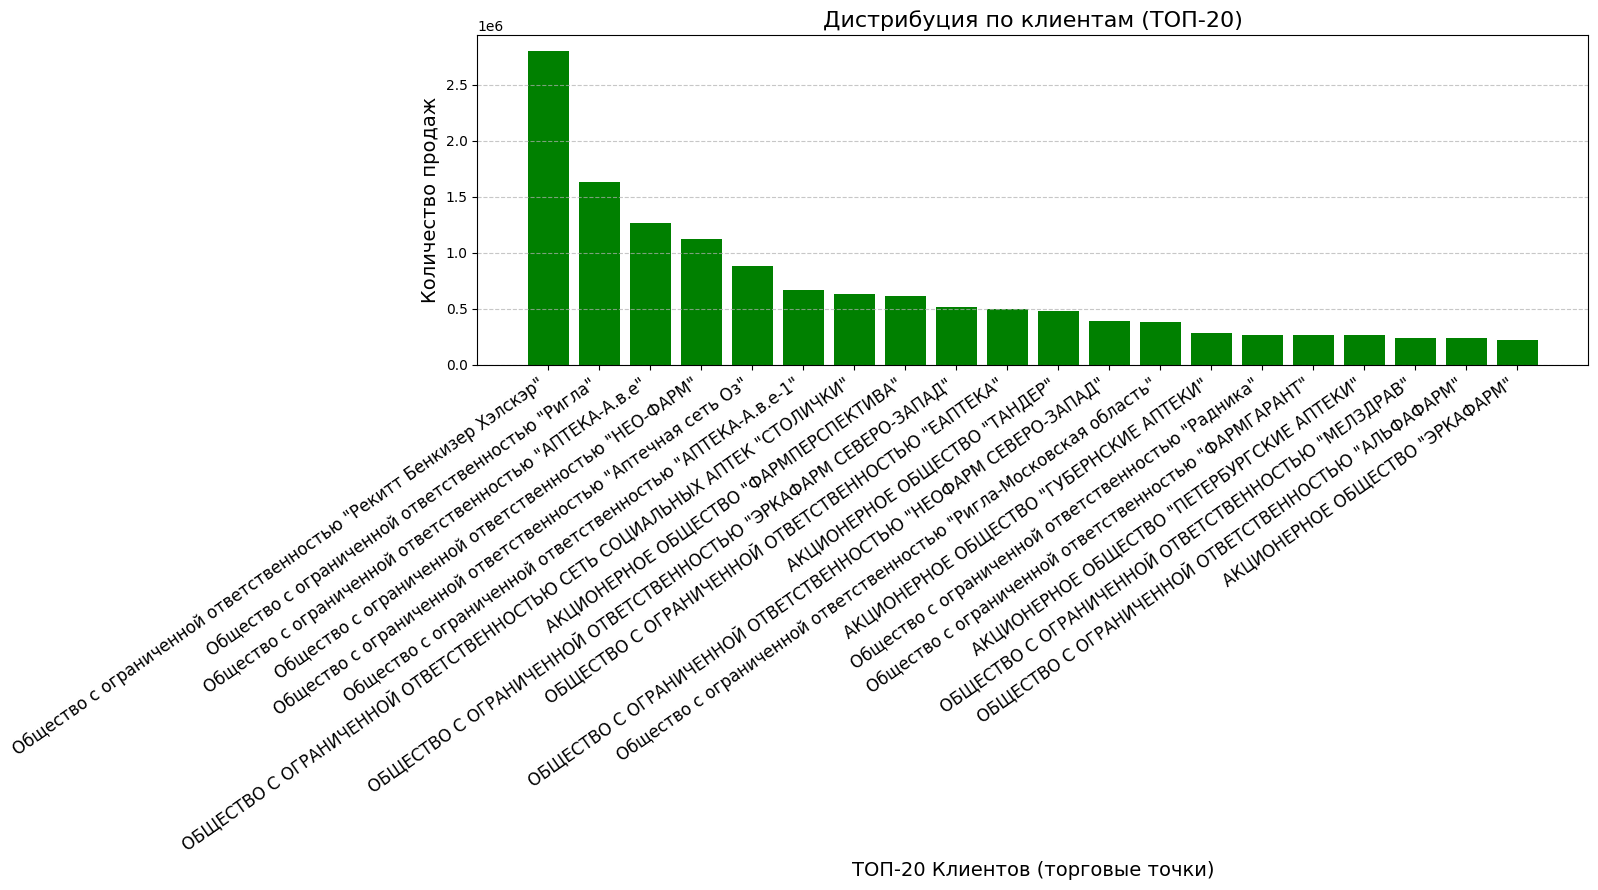

In [61]:
# Группируем данные по торговым точкам и суммируем количество продаж
distribution_by_client = full_data.groupby('org_name')['cnt'].sum().reset_index()

# Оставляем только ТОП-20 по продажам
distribution_by_client = distribution_by_client.sort_values(by="cnt", ascending=False).head(20)

# Теперь строим график
plt.figure(figsize=(16, 9))  # Увеличенный размер
plt.bar(distribution_by_client['org_name'], distribution_by_client['cnt'], color='green')

# Улучшаем подписи
plt.xticks(rotation=35, ha='right', fontsize=12)
plt.xlabel("ТОП-20 Клиентов (торговые точки)", fontsize=14)
plt.ylabel("Количество продаж", fontsize=14)
plt.title("Дистрибуция по клиентам (ТОП-20)", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Добавляем больше места для подписей
plt.subplots_adjust(bottom=0.4)

# Сохраняем график
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "distribution_by_client.png"))